In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.special import factorial as fact
from itertools import permutations, combinations, product
%config InlineBackend.figure_format = 'svg'
plt.style.use('bmh')

## 1. Задание

**Напишите код, моделирующий выпадение поля в рулетке (с учетом поля зеро).**

код ниже генерирует псевдослучайные числа в диапазоне от 0 до 36-ти включительно, моделируя тем самым спины (запуск шарика по желобку рулетки). При этом идёт подсчёт количества выпавших чётных или нечётных значений. Программа работает до первого выпадения 0 на рулетке и возвращает строку со статистикой игры

In [2]:
def roulette_game(stat=False, weight=False):
    even_number, odd_number, zero_number, spin_statistics = 0, 0, 0, []
    while True:
        x = np.random.randint(0, 37)
        if x == 0:
            zero_number += 1
            spin_statistics.append(x)
            break
        elif x % 2 == 0:
            even_number += 1
            spin_statistics.append(x)
        else:
            odd_number += 1
            spin_statistics.append(x)
    total = even_number + odd_number + zero_number
    if weight:
        print(f'выпало значений:\nчётных: {even_number}\nнечётных: {odd_number}\nноль:{zero_number}')
        print(f'всего спинов было: {total}\n\nобщая статистика:\n{spin_statistics}')
    if stat:
        print(f'\nвес одного спина = {round(1/total, 4)}')
        print(f'проверим: {round(1/total, 4)} * {total} = {(1/total) * total}')
    return None

In [3]:
# запустим, проверим
roulette_game(weight=True)

выпало значений:
чётных: 24
нечётных: 21
ноль:1
всего спинов было: 46

общая статистика:
[7, 26, 30, 28, 8, 4, 9, 3, 28, 18, 33, 29, 36, 15, 16, 26, 13, 24, 20, 23, 31, 25, 6, 34, 26, 29, 25, 33, 21, 24, 24, 2, 27, 23, 23, 36, 36, 12, 24, 36, 2, 23, 25, 27, 33, 0]


In [4]:
# ну и ещё разок
roulette_game(weight=1)

выпало значений:
чётных: 104
нечётных: 120
ноль:1
всего спинов было: 225

общая статистика:
[30, 7, 29, 22, 25, 6, 25, 12, 25, 17, 19, 7, 30, 33, 28, 6, 3, 16, 18, 1, 9, 35, 22, 36, 18, 7, 8, 27, 28, 33, 36, 33, 30, 19, 26, 24, 30, 13, 21, 14, 13, 20, 21, 14, 7, 11, 19, 21, 7, 21, 4, 16, 33, 17, 7, 7, 17, 13, 14, 15, 26, 31, 25, 16, 34, 20, 35, 25, 23, 35, 27, 24, 15, 25, 17, 35, 6, 24, 17, 21, 13, 14, 32, 24, 5, 21, 8, 16, 19, 4, 15, 19, 1, 28, 18, 18, 17, 4, 28, 20, 36, 24, 18, 15, 34, 8, 10, 12, 5, 28, 25, 22, 11, 28, 14, 33, 3, 8, 17, 30, 26, 2, 28, 2, 29, 10, 5, 5, 34, 32, 6, 10, 23, 8, 34, 9, 13, 2, 13, 35, 23, 33, 2, 27, 17, 35, 21, 18, 14, 7, 28, 1, 2, 29, 10, 36, 5, 1, 28, 34, 8, 13, 19, 5, 20, 22, 8, 32, 27, 17, 26, 29, 27, 27, 13, 9, 20, 23, 6, 26, 28, 29, 8, 12, 8, 35, 3, 27, 7, 23, 3, 3, 17, 1, 10, 18, 15, 11, 27, 18, 36, 19, 16, 10, 15, 1, 27, 2, 35, 33, 7, 4, 27, 18, 12, 31, 29, 32, 5, 34, 9, 12, 29, 27, 0]


## 2. Задание
#### 1) Напишите код, проверяющий любую из теорем сложения или умножения вероятности на примере рулетки или подбрасывания монетки.

пример на той же рулетке - если мы в функцию передадим аргумент weight=False, то получим дополнительно и информацию о весе одного спина, равного общему количеству спинов. Их сумма будет равна единице, как и положено по правилу сложении вероятностей

In [5]:
roulette_game(weight=1, stat=1)

выпало значений:
чётных: 4
нечётных: 11
ноль:1
всего спинов было: 16

общая статистика:
[31, 31, 14, 13, 10, 7, 33, 1, 33, 18, 3, 27, 13, 30, 25, 0]

вес одного спина = 0.0625
проверим: 0.0625 * 16 = 1.0


А общая формула сложения вероятностей: $P(A+B) = P(A) + P(B)$

по ней вероятность выпадения в рулетке:

In [6]:
print(f'красного = {np.round(18/37, 4)}\nчерного = {np.round(18/37, 4)}\nкрасного ИЛИ чёрного = {np.round(36/37, 4)}' 
f'\nкрасного И чёрного = {np.round((18/37)*(18/37), 4)}\nнуля = {np.round(1/37, 4)}')

красного = 0.4865
черного = 0.4865
красного ИЛИ чёрного = 0.973
красного И чёрного = 0.2367
нуля = 0.027


#### 2) Сгенерируйте десять выборок случайных чисел х0, …, х9. и постройте гистограмму распределения случайной суммы  +х0+ …+ х 9. 

код генерирует гистограмму со значением суммы 100 массивов по 10 псевдослучайных чисел в каждом с диапазоном значаний от 1 до 1000

Text(0.5, 1.0, '$\\sum$ 100-ти случайных выборок по 10 случайных чисел от 1 до 1000 в каждой\n')

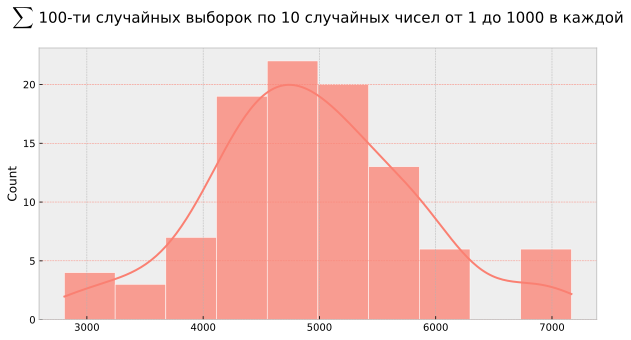

In [7]:
plt.figure(figsize=(10, 5))
x = [np.sum([np.random.randint(1, 1001) for _ in range(10)]) for _ in range(100)]
sns.histplot(data=x, kde=True, bins=10, ec='w', color='#FA8072', alpha=0.75)
plt.grid(axis='y', color='#FA8072')
plt.title('$\sum$ 100-ти случайных выборок по 10 случайных чисел от 1 до 1000 в каждой\n', fontsize=15)

## 3. Задание
#### 1) Дополните код Монте-Карло последовательности независимых испытаний расчетом соответствующих вероятностей (через биномиальное распределение) и сравните результаты.

In [8]:
# код с урока:
k, n = 0, 1000
a = np.random.randint(0, 2, n)
b = np.random.randint(0, 2, n)
c = np.random.randint(0, 2, n)
d = np.random.randint(0, 2, n)
x = a + b + c + d
for i in range(0, n):
    if x[i] == 2:
        k += 1
print(k, n, k/n)

368 1000 0.368


вероятность выпадения среди n испытаний k успехов выражается формулой Бернулли $P_n(k) = C_n^kp^kq^{n-k}$

где $C_n^k = \frac{n!}{k!(n - k)!}$, $q = 1 - p$

ниже формула, что принимает 3 аргумента:
1) $n$ - количество независимых испытаний

2) $k$ - количество наступлений события

3) $p$ - вероятность наступления события

и возвращает вероятность:

In [9]:
def sequence_of_independent_trials(n, k, p):
    try:
        assert n >= k and p <= 1
        C = fact(n)/(fact(k)*fact(n-k))
        print(f'C_n^k = {C}')
        q = 1-p
        v = C * p**k * q**(n-k)
        return f'вероятность выпадения {k} успехов среди {n} испытаний = {round(v, 4)}'
    except:
        print('некорректные значения')

In [10]:
# проверим:
n, k, p = 4, 2, 0.5
sequence_of_independent_trials(n, k, p)

C_n^k = 6.0


'вероятность выпадения 2 успехов среди 4 испытаний = 0.375'

#### 2) Повторите расчеты биномиальных коэффициентов и вероятностей k успехов в последовательности из n независимых испытаний, взяв другие значения n и k.

In [11]:
# ну и ещё разок:
sequence_of_independent_trials(10, 3, 0.5)

C_n^k = 120.0


'вероятность выпадения 3 успехов среди 10 испытаний = 0.1172'

## 4. Задание 
**Из урока по комбинаторике повторите расчеты, сгенерировав возможные варианты перестановок для других значений n и k**

функция ниже возвращает последовательности, сочетания и размещения (можно по отдельности, можно все вместе) и считает количество, сколько их там получилось

In [12]:
def prod_perm_comb(n, k, prod=False, perm=False, comb=False):
    count_prod, count_perm, count_comb = 0, 0, 0
    if prod:
        for i in product(n, repeat=k):
            print(''.join(i), end=' ')
            count_comb += 1
        print(f'\nпоследовательностей из {k} элементов = {count_comb}\n')
    if perm:
        for i in permutations(n, k):
            print(''.join(str(x) for x in i), end=' ')
            count_perm += 1
        print(f'\nсочетаний из {k} элементов = {count_perm}\n')
    if comb:
        for y in combinations(n, k):
            print(''.join(y), end=' ')
            count_comb += 1
        print(f'\nразмещений из {k} элементов = {count_comb}\n')
    return None

In [13]:
# проверим
prod_perm_comb('0123', 2, prod=True, perm=True, comb=True)

00 01 02 03 10 11 12 13 20 21 22 23 30 31 32 33 
последовательностей из 2 элементов = 16

01 02 03 10 12 13 20 21 23 30 31 32 
сочетаний из 2 элементов = 12

01 02 03 12 13 23 
размещений из 2 элементов = 22



In [14]:
# ну и ещё раз, с другими параметрами и, например, без последовательности:
prod_perm_comb('тралала', 3, perm=True, comb=True)

тра трл тра трл тра тар тал таа тал таа тлр тла тла тлл тла тар таа тал тал таа тлр тла тлл тла тла тар таа тал таа тал рта ртл рта ртл рта рат рал раа рал раа рлт рла рла рлл рла рат раа рал рал раа рлт рла рлл рла рла рат раа рал раа рал атр атл ата атл ата арт арл ара арл ара алт алр ала алл ала аат аар аал аал ааа алт алр алл ала ала аат аар аал ааа аал лтр лта лта лтл лта лрт лра лра лрл лра лат лар лаа лал лаа лат лар лаа лал лаа ллт ллр лла лла лла лат лар лаа лаа лал атр ата атл атл ата арт ара арл арл ара аат аар аал аал ааа алт алр ала алл ала алт алр ала алл ала аат аар ааа аал аал лтр лта лтл лта лта лрт лра лрл лра лра лат лар лал лаа лаа ллт ллр лла лла лла лат лар лаа лал лаа лат лар лаа лал лаа атр ата атл ата атл арт ара арл ара арл аат аар аал ааа аал алт алр ала ала алл аат аар ааа аал аал алт алр ала алл ала 
сочетаний из 3 элементов = 210

тра трл тра трл тра тал таа тал таа тла тлл тла тал таа тла рал раа рал раа рла рлл рла рал раа рла ала алл ала аал ааа ала лал

## 5. Задание 

**Дополните код расчетом коэффициента корреляции x и y по формуле**

$R = \frac{\sum(x_i - x_m)(y_i - y_m)}{\sqrt{\sum(x_i - x_m)^2\sum(y_i - y_m)^2}}$

скучно с простыми точками, построим вместо них облако звёздочек и сделаем их модными, офиициального цвета этого года Very Peri))

$R$ "вручную" считается в 12-й строчке кода, полученное значение выводится заголовком к графику

а в 14-й строчке проверяется с помощью встроенного метода np.corrcoef()

In [15]:
def point_cloud(n, r):
    plt.figure(figsize=(10, 5))
    x = np.random.rand(n)
    y = r*x + (1 - r)*np.random.rand(n)
    plt.plot(x, y, '*', color='#6868AC')
    plt.yticks([])
    plt.xticks([])
    plt.grid()
    A = np.vstack([x, np.ones(len(x))]).T
    a1, b1 = np.linalg.lstsq(A, y, rcond=-1)[0]
    plt.plot([0, 1], [b1, a1 + b1], lw=2, color='#F0E68C')
    R = np.sum((x-np.mean(x))*(y-np.mean(y))) / np.sqrt(np.sum((x-np.mean(x))**2)*np.sum((y-np.mean(y))**2))
    plt.title(f'коэффициент корреляции R = {R}')
    print(f'проверка с помощью встроенного метода:\n{np.corrcoef(x, y)}')
    plt.show()

проверка с помощью встроенного метода:
[[1.         0.51898905]
 [0.51898905 1.        ]]


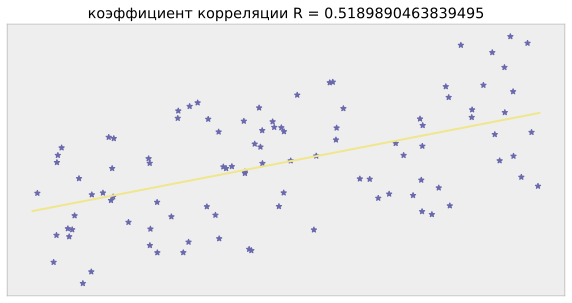

In [16]:
# рассыпем всяким точкек и посчитаем R
n, r = 100, 0.4
point_cloud(n, r)

проверка с помощью встроенного метода:
[[1.         0.94162339]
 [0.94162339 1.        ]]


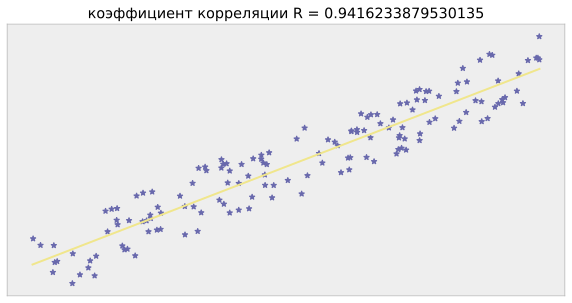

In [17]:
# ну и под финал проверим себя ещё раз с другими n и r
point_cloud(150, 0.74)